In [1]:
import yaml
import sys
import os
import numpy as np
import torch 
os.chdir('/home/jonfrey/PLR3')
sys.path.insert(0, os.getcwd())
sys.path.append(os.path.join(os.getcwd() + '/src'))
sys.path.append(os.path.join(os.getcwd() + '/lib'))

import loaders_v2
from loaders_v2 import GenericDataset
from rotations import * 

exp_cfg_path = '/home/jonfrey/PLR3/yaml/exp/exp_ws_deepim_debug_natrix.yml'
env_cfg_path = '/home/jonfrey/PLR3/yaml/env/env_natrix_jonas.yml'

def load_from_file(p):
    if os.path.isfile(p):
        with open(p, 'r') as f:
            data = yaml.safe_load(f)
    else:
        raise ValueError
    return data

exp = load_from_file(exp_cfg_path)
env = load_from_file(env_cfg_path)

dataset_train = GenericDataset(
    cfg_d=exp['d_train'],
    cfg_env=env)

Start loading meshes
Finished loading meshes 1.7685916423797607


In [2]:
# print( dataset_train._backend.get_camera('data_syn/000001', K=False, idx =True) )
# print( dataset_train._backend.get_camera('data/0068/000001', K=False, idx = True ) )
# real_img.shape
# real_img, render_img
# big2 = np.moveaxis(np.moveaxis( np.concatenate( [real_img.numpy(), render_img.numpy() ], axis=2), 2,1),1,2)
# big2.shape

In [8]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

class Drawer():
    def __init__(self):
        self.im_in_plot = 0
        self.data = []
    def disp_img_1d(self,img,hold=False):
        self.data.append(img)
        
        if not hold:
            fig = plt.figure(figsize=(6*2*len(self.data),7))
            ax = []
            for j,a in enumerate(self.data):
                ax.append( fig.add_subplot(1,len(self.data), j+1)  )
                
                ax[-1].get_xaxis().set_visible(False)
                ax[-1].get_yaxis().set_visible(False)
                pos = ax[-1].imshow( a, cmap='Blues' )
                fig.colorbar(pos, ax=ax[-1])
            plt.show()
            self.data = []
            self.ax = []
            print('SHOW')


In [9]:
batch = dataset_train[10450][0] #bann 10450
points, choose, img, target, model_points, idx = batch[0:6]
depth_img, label_img, img_orig, cam = batch[6:10]
gt_rot_wxyz, gt_trans, unique_desig = batch[10:13]

real_img, render_img, real_d, render_d, gt_label_cropped = batch[13:18]
pred_rot_wxyz, pred_trans, pred_points, h_render, render_img_original = batch[18:23]
u_map, v_map, x_map, y_map, z_map, uu_map, vv_map, bb_real, bb_ren, u_full, v_full= batch[23:]

Finished with 2323 matches and within 6000 iteartions, len(out), 50944
LABEL_IMG compard to index  2
Time to get flow 4.993306398391724
Render TL Cor: tensor([ 7., 38.]), BR Cor: tensor([451., 629.]), Widht: 591.0, Height: 444.0
REAL TL Cor: tensor([ -40., -127.], dtype=torch.float64), BR Cor: tensor([411., 473.], dtype=torch.float64), Widht: 600.0, Height: 451.0
get_rendered_data time 32.32345962524414s
Getitem time: 32.4242844581604


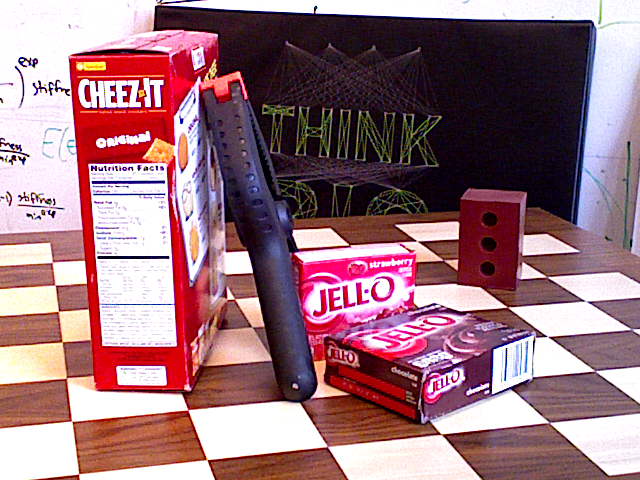

In [10]:
display( Image.fromarray(np.uint8(img_orig.numpy())) )

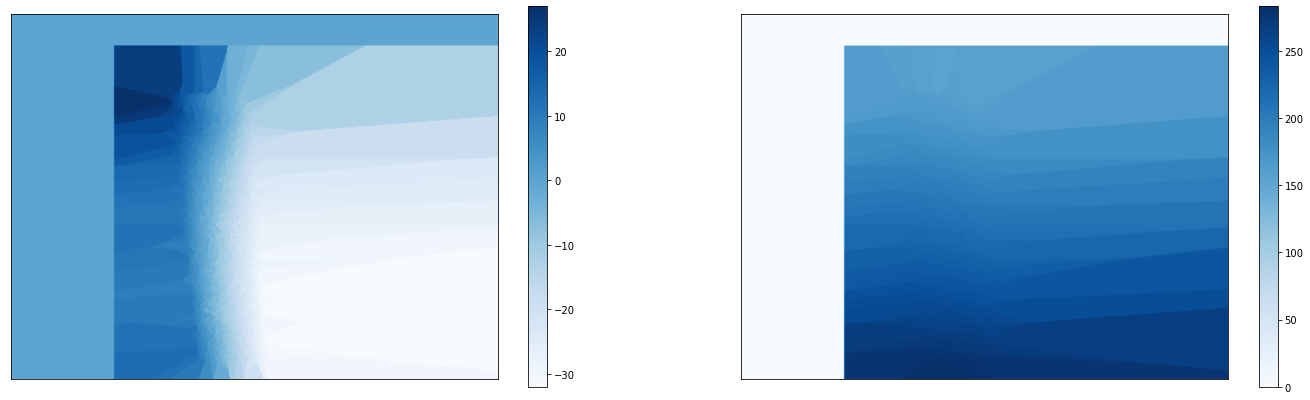

SHOW


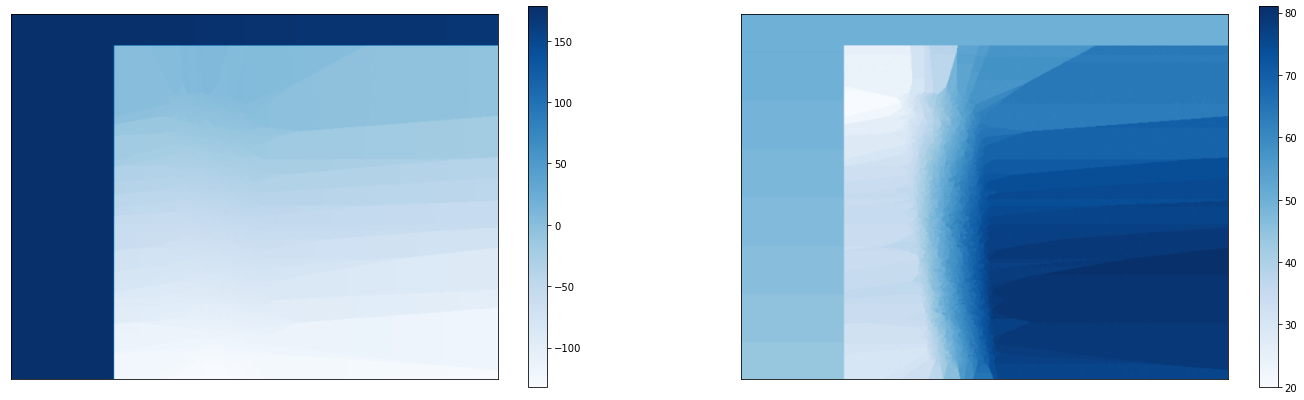

SHOW


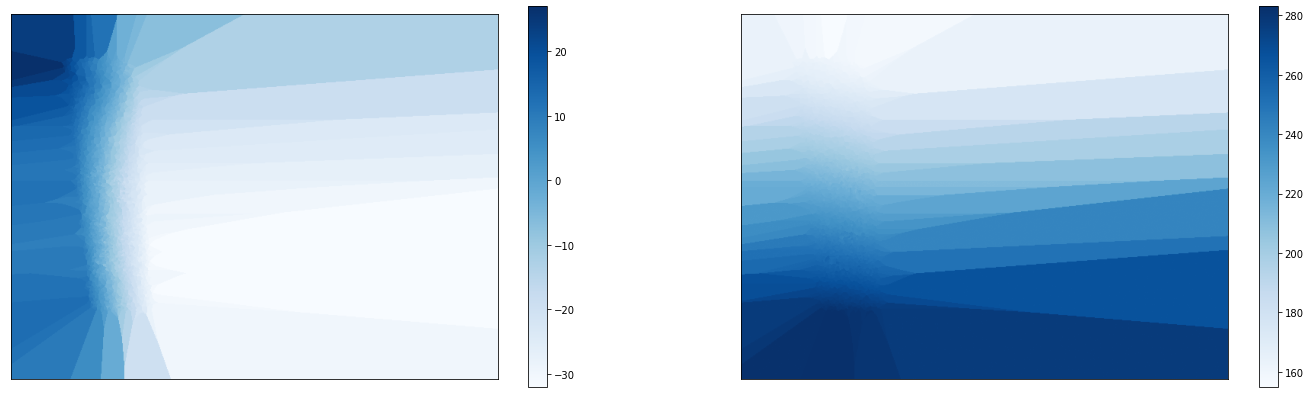

SHOW


In [12]:


visu= Drawer()
 
# visu.disp_img_1d(x_map, True)
# visu.disp_img_1d(y_map, True)
# print(f'xyz_map:, {unique_desig[1]}')
# visu.disp_img_1d(z_map, True)
# print('uv_map:')
visu.disp_img_1d(u_map, True)
visu.disp_img_1d(v_map)


visu.disp_img_1d(uu_map, True)
visu.disp_img_1d(vv_map)

visu.disp_img_1d(u_full, True)
visu.disp_img_1d(v_full)


# visu.disp_img_1d((label_img * (label_img==unique_desig[1])).numpy())
# # display( Image.fromarray(np.uint8(img_orig.numpy())) )
# # display( Image.fromarray(np.uint8(render_img_original.numpy()[0])) )

h,w,c = img_orig.shape
col = (0, 255, 0)
grey = (207, 207, 207)

(480, 1280, 3)
(480, 1280, 3)


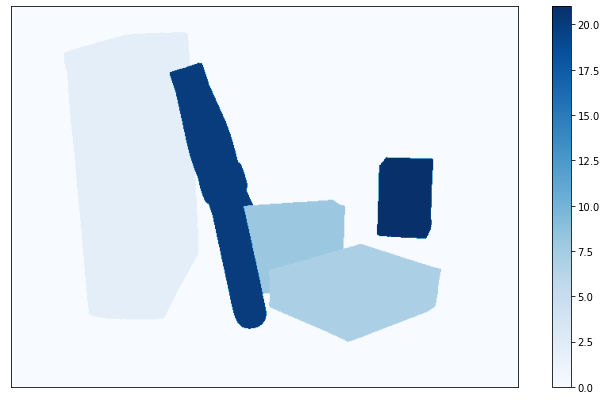

SHOW


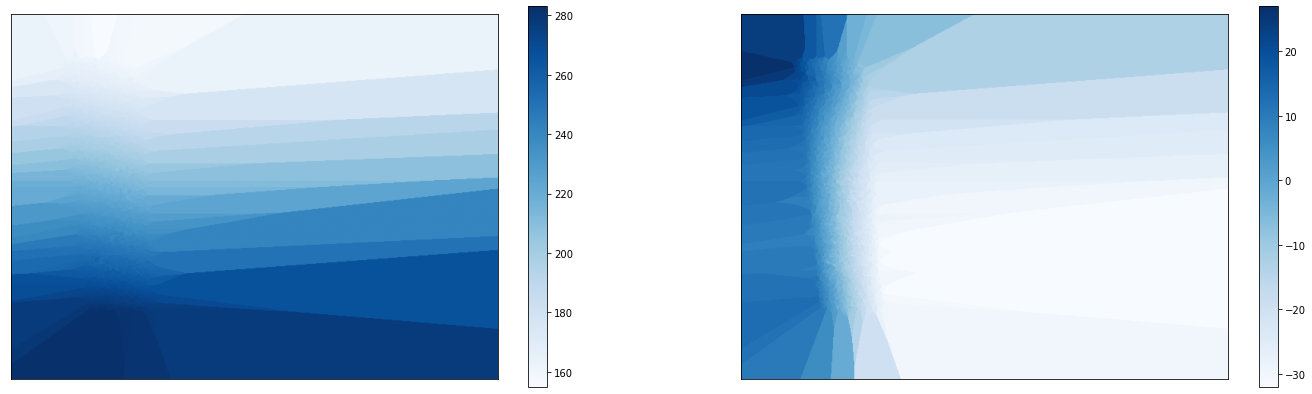

SHOW


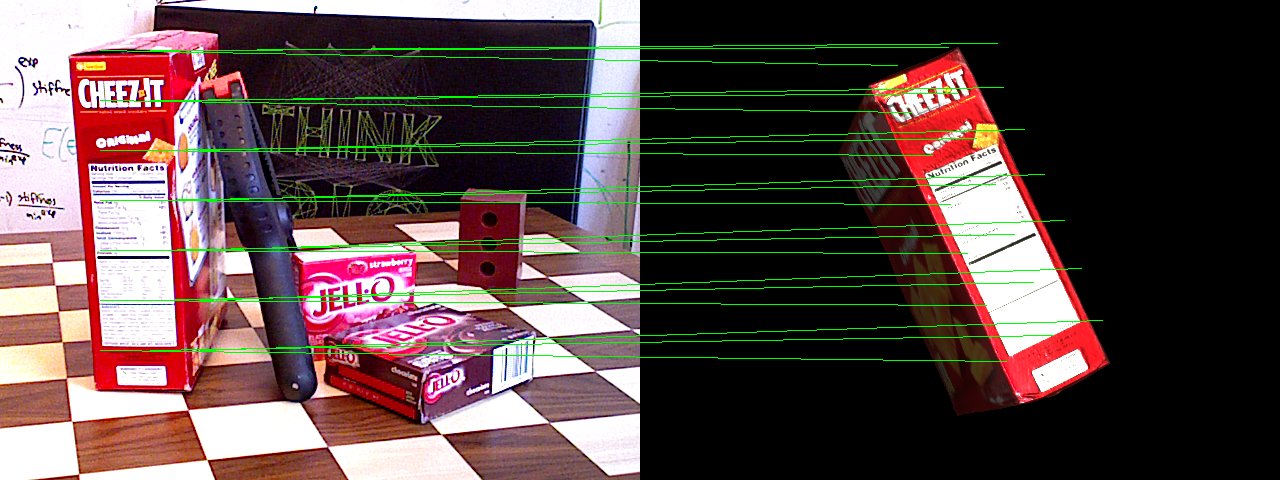

In [16]:


# Render TL Cor: tensor([90., 80.]), BR Cor: tensor([424., 525.]), Widht: 445.0, Height: 334.0
# REAL TL Cor: tensor([165., 191.], dtype=torch.float64), BR Cor: tensor([297., 368.], dtype=torch.float64), Widht: 177.0, Height: 132.0              


# _w_in_cropped_real = 240
# _h_in_cropped_real = 270

# off, s = 191, w/177
# _w_in_real = int ( _w_in_cropped_real/s + off)
# off, s = 165, h/132
# _h_in_real = int( _h_in_cropped_real/s + off)

# _corrospnding_w_in_render = int(_w_in_real + u_map[_h_in_cropped_real,_w_in_cropped_real])
# _corrospnding_h_in_render = int(_h_in_real + v_map[_h_in_cropped_real,_w_in_cropped_real])

# off, s = 80,w/445
# _corrospnding_w_in_cropped_render =int ( off + _corrospnding_w_in_render * s )
# off, s = 90,h/334
# _corrospnding_h_in_cropped_render = int( off + _corrospnding_h_in_render * s )

# print(f'W,H Cropped REAL: {_w_in_cropped_real} | {_h_in_cropped_real}')
# print(f'W,H REAL: {_w_in_real} | {_h_in_real}')
# print(f'W,H Render: {_corrospnding_w_in_render} | {_corrospnding_h_in_render}')
# print(f'W,H Cropped Render: {_corrospnding_w_in_cropped_render} | {_corrospnding_h_in_cropped_render}')
# s = 10
# print(real_img.shape)
# t0 = np.uint8(real_img.permute((1,2,0)).numpy())
# print(t0.shape)
# t0[_h_in_cropped_real:_h_in_cropped_real+s, _w_in_cropped_real:_w_in_cropped_real+s, 0]= 0
# t0[_h_in_cropped_real:_h_in_cropped_real+s, _w_in_cropped_real:_w_in_cropped_real+s, 1] = 255
# t0[_h_in_cropped_real:_h_in_cropped_real+s, _w_in_cropped_real:_w_in_cropped_real+s, 2]= 0
# display( Image.fromarray(t0) )

t1 = np.uint8(img_orig.numpy())
# t1[_h_in_real:_h_in_real+s, _w_in_real:_w_in_real+s, 0]= 0
# t1[_h_in_real:_h_in_real+s, _w_in_real:_w_in_real+s, 1] = 255
# t1[_h_in_real:_h_in_real+s, _w_in_real:_w_in_real+s, 2]= 0
# display( Image.fromarray(t1) )

t2 = np.uint8(render_img_original.numpy()[0])
# print(t2.shape, _corrospnding_h_in_render)
# t2[_corrospnding_h_in_render:_corrospnding_h_in_render+s, _corrospnding_w_in_render:_corrospnding_w_in_render+s, 0] = 0
# t2[_corrospnding_h_in_render:_corrospnding_h_in_render+s, _corrospnding_w_in_render:_corrospnding_w_in_render+s, 1] = 255
# t2[_corrospnding_h_in_render:_corrospnding_h_in_render+s, _corrospnding_w_in_render:_corrospnding_w_in_render+s, 2] = 0
# display( Image.fromarray(t2) )


# t4 = np.uint8(render_img.permute((1,2,0)).numpy())
# print(t2.shape, _corrospnding_h_in_render)
# t4[_corrospnding_h_in_cropped_render:_corrospnding_h_in_cropped_render+s, _corrospnding_w_in_cropped_render:_corrospnding_w_in_cropped_render+s, 0] = 0
# t4[_corrospnding_h_in_cropped_render:_corrospnding_h_in_cropped_render+s, _corrospnding_w_in_cropped_render:_corrospnding_w_in_cropped_render+s, 1] = 255
# t4[_corrospnding_h_in_cropped_render:_corrospnding_h_in_cropped_render+s, _corrospnding_w_in_cropped_render:_corrospnding_w_in_cropped_render+s, 2] = 0
# display( Image.fromarray(t2) )

#Dense Version
big2 = np.swapaxes( np.concatenate( [real_img.numpy(), render_img.numpy() ], axis=2).astype(np.uint8).T,0,1)

bigX = np.concatenate( [ np.swapaxes(real_img.numpy().T,0,1), t2 ], axis=1 ).astype(np.uint8)

big3 = np.concatenate( [t1,t2 ], axis=1)
import copy
big4 = copy.deepcopy( big2 )

print(bigX.shape)
print(big3.shape)
img2 = Image.fromarray(big2)
draw2 = ImageDraw.Draw(img2)

img3 = Image.fromarray(big3)
draw3 = ImageDraw.Draw(img3)

img4 = Image.fromarray(big4)
draw4 = ImageDraw.Draw(img4)

imgX = Image.fromarray(bigX)
drawX = ImageDraw.Draw(imgX)

# for _w in range(0,w,50):
#     for _h in range(0,h,50):
#         if gt_label_cropped[_h,_w] == unique_desig[1] :
#             try:
# #             ren_tl = [48., 97.]
# #             ren_w ,ren_h  = 485.0,  364.0
            
# #             real_tl = [185., 101.]
# #             real_w, real_h = 260.0, 195.0

# #             __w_real = _w/(w/real_w) + real_tl[1]
# #             __h_real = _h/(h/real_h) + real_tl[0]
            
# #             __corrospnding_w_in_render =  __w_real   + int(v_map[_h,_w])
# #             __corrospnding_h_in_render =  __h_real   + int(u_map[_h,_w]) 
# #             __corrospnding_w_in_cropped_render = int( (__corrospnding_w_in_render - ren_tl[1]) * (w/ren_w))
# #             __corrospnding_h_in_cropped_render = int( (__corrospnding_h_in_render - ren_tl[0]) * (h/ren_h)) 
# #             uuu = int( _w - (__corrospnding_w_in_cropped_render) )
# #             vvv = int( _h - (__corrospnding_h_in_cropped_render) )
            
#                 vvv = vv_map[_h,_w]
#                 uuu = uu_map[_h,_w]
#     #             draw3.line([(__w_real, __h_real), (int(__corrospnding_w_in_render +640), int(__corrospnding_h_in_render ))],
#     #               fill=col, width=1)
#                 draw4.line([(_w, _h), (int(_w +640 + uuu), _h+ vvv)],
#                   fill=col, width=1)
#                 drawX.line([(_w, _h), (int(_w +640 + uuu), _h+ vvv)],
#                   fill=col, width=1)
                
visu.disp_img_1d(label_img)
visu.disp_img_1d(v_full, True)
visu.disp_img_1d(u_full)
for _w in range(0,w,50):
    for _h in range(0,h,50):       
        if label_img[_h,_w] == unique_desig[1]:
            try:
                vvv = u_full[_h,_w]
                uuu = v_full[_h,_w]
                draw3.line([(_w, _h), (int(_w +640 + uuu), _h + vvv)],
                  fill=col, width=1)
            except:
                pass
display(img3)

In [ ]:
w
h

In [ ]:
# analyze the mesh info we already have

import os
import numpy as np
import trimesh
import random 
from pathlib import Path

p = '/media/scratch1/jonfrey/datasets/YCB_Video_Dataset/models'
cad_models = [str(p) for p in Path(p).rglob('*.obj')]
print(cad_models[3])
mesh = trimesh.load(cad_models[3])

In [ ]:
def transform_mesh(mesh, H):
    """ directly operates on mesh and does not create a copy!"""
    t = np.ones((mesh.vertices.shape[0],4)) 
    t[:,:3] = mesh.vertices
    mesh.vertices = (t @ H.T)[:,:3]
    return mesh

In [ ]:
h= 480
w= 640
cx = 312.9869
cy = 241.3109
fx = 1066.778
fy = 1067.487
K = np.array([[fx,0,cx],[0,fy,cy],[0,0,1]])
u_cor = np.arange(0,h,1)
v_cor = np.arange(0,w,1)
K_inv = np.linalg.inv(K)
rays_dir = np.zeros((h*w,3))
nr = 0

rays_origin_render = np.zeros((h*w,3))
rays_origin_real = np.zeros((h*w,3))
nr_to_image_plane = np.zeros((h*w,2), dtype=np.float)
for u in u_cor:
    for v in v_cor:
        rays_dir[nr,:] = K_inv @ np.array([u,v, 1])  * 0.6 - (K_inv @ np.array([u,v, 1])) * 0.25
        rays_origin_render[nr,:] = K_inv @ np.array([u,v, 1])  * 0.1
        rays_origin_real[nr,:] = K_inv @ np.array([u,v, 1])  * 0.25
        nr_to_image_plane[nr, 0] = u
        nr_to_image_plane[nr, 1] = v
        nr += 1


        

In [ ]:
batch = dataset_train[0][0]
points, choose, img, target, model_points, idx = batch[0:6]
depth_img, label_img, img_orig, cam = batch[6:10]
gt_rot_wxyz, gt_trans, unique_desig = batch[10:13]
real_img, render_img, real_d, render_d, gt_label_cropped, pred_rot_wxyz, pred_trans, pred_points, h_ren, img_ren = batch[13:]
img_ren = img_ren[0]
h,w

dataset_tain._backend.load_flow()
def get_homo_np(q, t):
    h = np.eye(4)
    h[:3,:3] =  quat_to_rot( torch.tensor( q ) ).numpy()
    h[:3,3] = t
    return h

l = label_img.numpy()[0]
h_render = h_ren[0].numpy()
h_real= get_homo_np( gt_rot_wxyz[None,:], gt_trans[None,:] )
idx_ = idx[0]
cam = 0

In [ ]:
p = '/media/scratch1/jonfrey/datasets/YCB_Video_Dataset/models'
cad_models = [str(p) for p in Path(p).rglob('*.obj')]
mesh = {}

cad_models[0].split('/')[-2]

In [ ]:
import copy
from trimesh.ray.ray_pyembree import RayMeshIntersector
from rotations import quat_to_rot
import torch 
from scipy.interpolate import griddata
import time 

def get_homo_np(q, t):
    h = np.eye(4)
    h[:3,:3] =  quat_to_rot( torch.tensor( q ) ).numpy()
    h[:3,3] = t
    return h
max_matches = 500
max_iterations = 5000
grid_x, grid_y = np.mgrid[0:h, 0:w]

# Load correct mesh accroding to desig
obj = list(self._name_to_idx.keys())[unique_desig[1]-1]
for m in cad_models:
    if m.find(obj) != -1:
        

def load_meshes(self):
    p = '/media/scratch1/jonfrey/datasets/YCB_Video_Dataset/models'
    p = self._p_ycb + '/models'
    cad_models = [str(p) for p in Path(p).rglob('*.obj')]
    mesh = {}
    for pa in cad_models:
        mesh[pa.split('/')[-2] ] = trimesh.load(pa)
        
# Make copy to transform the mesh
m_real = copy.deepcopy(mesh)
m_render = copy.deepcopy(mesh)
h_render = h_ren[0].numpy()

h_real= get_homo_np( gt_rot_wxyz[None,:], gt_trans[None,:] )
transform_mesh(m_real, h_real)
transform_mesh(m_render, h_render)

rmi_real = RayMeshIntersector(m_real)
rmi_render = RayMeshIntersector(m_render)

st = time.time()
render_res = rmi_render.intersects_location(ray_origins=rays_origin_render, 
                               ray_directions=rays_dir,
                               multiple_hits=False)
real_res = rmi_real.intersects_location(ray_origins=rays_origin_real, 
                               ray_directions=rays_dir,
                               multiple_hits=False)
# real_res contains: points, mesh, ray

print(f'Total time RMI: {time.time()-st}')
st = time.time()
#coordinate of point in 3D + descriptor(mesh index)
render_des = np.zeros( (h,w,4) ) 
real_des = np.zeros( (h,w,4) )
for i in range(real_res[1].shape[0]):
    u = int(nr_to_image_plane[ real_res[1][i] ][1])
    v = int(nr_to_image_plane[ real_res[1][i] ][0])
    real_des[u,v,:3] = np.array( real_res[0][i] )
    real_des[u,v,3] = real_res[2][i]
for i in range(render_res[1].shape[0]):
    u = int(nr_to_image_plane[ render_res[1][i] ][1])
    v = int(nr_to_image_plane[ render_res[1][i] ][0])
    render_des[u,v,:3] = np.array( render_res[0][i] )
    render_des[u,v,3] = render_res[2][i]
print(f'Total time Array Filling: {time.time()-st}')

st = time.time()

indices = real_des[:,:,3] != 0
uv = np.where(indices == True)
ind2 = render_des[:,:,3] != 0
uv2 = np.where(ind2 == True)
comp = render_des[ind2][:,3][:,None]
disparity_pixels = np.zeros((h,w,2))-999
disparity_world = np.zeros((h,w,3))
evals = int(uv[0].shape[0]/res)

out = [i for i in range(0,uv[0].shape[0]-1)]
random.shuffle( out )
matches = 0
iterations = 0
while matches < max_matches and iterations < max_iterations and iterations < len(out):
    i = out[iterations]
    iterations += 1
    _w, _h = uv[1][i],uv[0][i]
    ind = (comp == real_des[_h,_w,3])
    s = np.where(ind == True) 
    if s[0].shape[0] > 0:
        matches += 1
        u,v = uv2[0][s[0][0]], uv2[1][s[0][0]]                
        disparity_pixels[_h,_w,0] = u - _h
        disparity_pixels[_h,_w,1] = v - _w
        disparity_world[_h,_w,:] = render_des[_h,_w,:3]-real_des[_h,_w,:3]
        
print(f'Disparity {res}-Calculations: {time.time()-st}, Matches {matches} within Iterations {iterations}')

st = time.time()

f_1 = label_img.numpy() == int( unique_desig[1])
f_2 = disparity_pixels[:,:,0] != -999
f_3 = f_1*f_2
points = np.where(f_3!=False)
points = np.stack( [np.array(points[0]), np.array( points[1]) ], axis=1)

u_map = griddata(points, disparity_pixels[f_3][:,0], (grid_x, grid_y), method='nearest')
v_map = griddata(points, disparity_pixels[f_3][:,1], (grid_x, grid_y), method='nearest')
x_map = griddata(points, disparity_world[f_3][:,0], (grid_x, grid_y), method='nearest')
y_map = griddata(points, disparity_world[f_3][:,1], (grid_x, grid_y), method='nearest')
z_map = griddata(points, disparity_world[f_3][:,2], (grid_x, grid_y), method='nearest')


In [ ]:
def disp_img_1d(img):
    import matplotlib.pyplot as plt
    fig = plt.figure()
    x_plots = 1
    ax1 = fig.add_subplot(1, x_plots ,1)
    pos = ax1.imshow( img, cmap='Blues' )
    fig.colorbar(pos, ax=ax1)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.show()
print('x_map:')   
disp_img_1d(x_map)
print('y_map:')

disp_img_1d(y_map)
print('z_map:')

disp_img_1d(z_map)
print('u_map:')

disp_img_1d(u_map)
print('v_map:')
disp_img_1d(v_map)


In [ ]:
from PIL import ImageDraw

big = np.concatenate( [img_orig, img_ren], axis=1) 
img = Image.fromarray(np.uint8(big))
draw = ImageDraw.Draw(img)

col = (0, 255, 0)
grey = (207, 207, 207)
for _w in range(0,w,5):
    for _h in range(0,h,5):
        if label_img[_h,_w] == unique_desig[1] and (disparity_pixels[_h,_w,0] != -999 or disparity_pixels[_h,_w,1] != -999):
            try:
                draw.line([(_w, _h), (_w + disparity_pixels[_h,_w,1]+640, _h + disparity_pixels[_h,_w,0])],
                  fill=col, width=1)
            except:
                pass
display(img)


#Dense Version
big2 = np.concatenate( [img_orig, img_ren], axis=1) 
img2 = Image.fromarray(np.uint8(big2))
draw2 = ImageDraw.Draw(img2)

col = (0, 255, 0)
grey = (207, 207, 207)
for _w in range(0,w,5):
    for _h in range(0,h,5):
        if label_img[_h,_w] == unique_desig[1]:
            try:
                draw2.line([(_w, _h), (int(_w + v_map[_h,_w]+640), int( _h + u_map[_h,_w]))],
                  fill=col, width=1)
            except:
                pass
display(img2)

In [ ]:
from matplotlib import cm
from PIL import Image
# plot the corrosponding meshed !
jet = cm.get_cmap('jet')
c = int( max( np.max(real_des[:,:,3]), np.max(render_des[:,:,3])) ) +1
SEG_COLORS = (np.stack([jet(v) for v in np.linspace(0, 1, c)]) * 255).astype(np.uint8)

def plot(label):
    image_out = np.zeros(
    (label.shape[0], label.shape[1], 3), dtype=np.uint8)
    for h in range(label.shape[0]):
        for w in range(label.shape[1]):
            image_out[h, w, :] = SEG_COLORS[int(label[h, w])][:3]
    display(Image.fromarray(np.uint8(image_out)))
    return image_out

im_out2 = plot(real_des[:,:,3])
im_out = plot(render_des[:,:,3])


In [ ]:
"""
DEPRECATED
DEPRECATED
DEPRECATED
DEPRECATED
DEPRECATED
DEPRECATED
"""

label_img.shape

from scipy.interpolate import griddata
f_1 = label_img.numpy() == int( unique_desig[1])
f_2 = disparity_pixels[:,:,0] != -999

f_3 = f_1*f_2
points = np.where(f_3!=False)
points = np.stack( [np.array(points[0]), np.array( points[1]) ], axis=1)

# print(f_3[:,:,None].repeat(3,3).shape)
# o = f_3[:,:,None](1,1,2)
print(f_1.shape, f_2.shape , disparity_pixels.shape)
print( disparity_pixels[f_3].shape )

grid_x, grid_y = np.mgrid[0:h, 0:w]
grid_z0 = griddata(points, disparity_pixels[f_3][:,0], (grid_x, grid_y), method='nearest')
o = np.repeat( np.expand_dims(grid_z0,2),3,2)
print(o.shape)
disp_img(o)

In [ ]:
import cv2

distCoeffs1 = np.array([0,0,0,0])
distCoeffs2 = np.array([0,0,0,0])
cameraMatrix1 = K
cameraMatrix2 = K

h_real_inv = np.eye(4)
h_real_inv[:3,:3] = np.linalg.inv(h_real[:3,:3])
h_real_inv[:3,3] = - h_real_inv[:3,:3] @ h_real[:3,3]

h_render_inv = np.eye(4)
h_render_inv[:3,:3] = np.linalg.inv(h_render[:3,:3])
h_render_inv[:3,3] = - h_render_inv[:3,:3] @ h_render[:3,3]

h_real_to_render = h_real_inv @ h_render


  
def val(r,t):
    # 
    # r = R.from_euler('z', 270, degrees=True).as_matrix() 
    dist = np.array([0,0,0,0])
    print(f'Input t: {t}')
    R1, R2, P1, P2, *_ = cv2.stereoRectify(cameraMatrix1, dist, cameraMatrix2, dist ,(w,h), r,t)
    map1, map2 = cv2.initUndistortRectifyMap(cameraMatrix1, dist, R1 , P1, (w,h), cv2.CV_32FC1)

#     print('T', T, 'RES0', R1, R2)
    print(f'R1 \n {R1} \n')
    print(f'R2 \n {R2} \n')
    print(f'P1 \n {P1} \n')
    print(f'P2 \n {P2} \n')

    for i in range( 200,210):
        for j in range (200,210):
            u = map1[i,j]
            v = map2[i,j]
#             print( f'coordintate {i},{j} is mapped to {u},{v}')  

    inp  = np.transpose( img_orig.numpy(), (0,1,2) )
    inp2  = np.transpose( img_ren.numpy(), (0,1,2) )
    img_out = cv2.remap( inp , map1, map2,
          interpolation=cv2.INTER_NEAREST,
          borderMode=cv2.BORDER_CONSTANT,
          borderValue=(0, 0, 0, 0))
    img_out2 = cv2.remap( inp2 , map1, map2,
          interpolation=cv2.INTER_NEAREST,
          borderMode=cv2.BORDER_CONSTANT,
          borderValue=(0, 0, 0, 0))
        
    # display([ Image.fromarray(np.uint8( img_out )), Image.fromarray(np.uint8( img_ren ))] ) 
    # display(Image.fromarray(np.uint8( img_ren ))) 
    # display(Image.fromarray(np.uint8(img_orig ))) 
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax1 = fig.add_subplot(1,4,1)
    ax1.imshow( Image.fromarray(np.uint8( img_out )) )
    ax2 = fig.add_subplot(1,4,2)
    ax2.imshow(Image.fromarray(np.uint8( img_ren )))
    ax3 = fig.add_subplot(1,4,3)
    ax3.imshow(Image.fromarray(np.uint8( img_orig )))
    ax4 = fig.add_subplot(1,4,4)
    ax4.imshow(Image.fromarray(np.uint8( img_out2 )))
    ax4.get_xaxis().set_visible(False)
    ax4.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax3.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)
    fig.show()
    
t = h_real[:3,3] - h_render[:3,3]
print(t)
from scipy.spatial.transform import Rotation as R
val(R.from_euler('z', 0, degrees=True).as_matrix()  ,t)  #np.array([0.6,0,0.4])
# val(np.eye(3),np.array([0,0.5,0]))
# val(np.eye(3),np.array([0.5,0,0]))
# val(np.eye(3),np.array([0.5,0.5,0.5]))
# val(np.eye(3),np.array([0.5,0.5,0]))


ret, K1, D1, K2, D2, R, T, E, F = cv2.stereoCalibrate(objp, leftp, rightp, K1, D1, K2, D2, image_size)

# cv2.__version__
# cameraMatrix1 


# grid_x, grid_y = np.mgrid[0:h, 0:w]
# points.shape
# whichImage = 0
# import cv2
# imagePoints = []
# imagePoints2 = []
# objectPoints = []
# for u in range(0,h,10):
#     for v in range(0,w,10):
#         if real_des[u,v,3] != 0:
            
            
            
#             ind = (render_des[:,:,3] == real_des[u,v,3])
#             _u,_v = np.where(ind == True) 
#             if len(_u) > 0:
#                 imagePoints.append(np.array( [u,v],  dtype = np.float32)) 
#                 imagePoints2.append(np.array([_u[0],_v[0]], dtype = np.float32))
#                 objectPoints.append( np.array( real_des[u,v,:3],dtype=np.float32) )
# #                 print(f'added {imagePoints[-1]} {objectPoints[-1]}')
            

# cameraMatrix = K

# F, mask = cv2.findFundamentalMat(np.array( imagePoints ) , np.array( imagePoints2 ) ,cv2.FM_LMEDS)
# # print(np.array(objectPoints).shape, np.array( imagePoints).shape)
# # res = cv2.calibrateCamera(objectPoints[:10], imagePoints[:10], (h,w), None,None)

# points = np.concatenate( [grid_x[:,:,None],grid_y[:,:,None]],2) 
# points = points.reshape(-1,2)
# lines = cv2.computeCorrespondEpilines(points, 0, F)


#What am i doing. Fuck 

# # grid_x, grid_y = np.mgrid[0:h, 0:w]
# # map_orgi = np.concatenate( [grid_x[:,:,None],grid_y[:,:,None]],2) 

# print('GRID', grid_x.shape,grid_y)


# #         inp  = img_orig.numpy()
# #         print(inp.shape, map1.shape)
# #         new_real = cv2.remap(inp, map1, map2,
# #                               interpolation=cv2.INTER_NEAREST,
# #                               borderMode=cv2.BORDER_CONSTANT,
# #                               borderValue=(0, 0, 0, 0))

# #     display(Image.fromarray(np.uint8(new_real)))         
# #     print('MAP1',map1)
# #     display(Image.fromarray(np.uint8(img_rend)))

# import numpy.linalg as la
# def rectify_images_float(img1, H1, img2, H2, K, d, shearing=False):
#     imsize = (img1.shape[1], img1.shape[0])
#     if shearing:
#         S = epipolar.rectify_shearing(H1, H2, imsize)
#         H1 = S.dot(H1)
#     rH = la.inv(K).dot(H1).dot(K)
#     lH = la.inv(K).dot(H2).dot(K)
    
    
    
#     map1x, map1y = cv2.initUndistortRectifyMap(K, d, rH, K, imsize, cv.CV_16SC2)
#     map2x, map2y = cv2.initUndistortRectifyMap(K, d, lH, K, imsize, cv.CV_16SC2)

#     rimg1 = cv2.remap(img1, map1x, map1y,
#                       interpolation=cv.INTER_NEAREST,
#                       borderMode=cv2.BORDER_CONSTANT,
#                       borderValue=(0, 0, 0, 0))
#     rimg2 = cv2.remap(img2, map2x, map2y,
#                       interpolation=cv.INTER_NEAREST,
#                       borderMode=cv2.BORDER_CONSTANT,
#                       borderValue=(0, 0, 0, 0))

#     return rimg1, rimg2

# rimg1, rimg2 = rectify_images_float(img_orig, h_real_inv, img_ren, h_render_inv, K, distCoeffs1 )
# display(Image.fromarray(np.uint8(rimg1)))